# **Import Libs**

In [13]:

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import tensorflow as tf
import matplotlib.pyplot as plt


In [14]:

data_file = open('dataset.json').read()
intents = json.loads(data_file)

In [15]:
import nltk
nltk.download('punkt')
nltk.download('corpus')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Preproccessing**

In [16]:
#creating lists
words=[]
classes = []
documents = []

#ignore these punctuation marks
punctuation_marks = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

# Get the list of NLTK stopwords
stopwords_list = stopwords.words('english')

# Combine the lists
ignore_words = punctuation_marks + stopwords_list

for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenization technique
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #adding documents
        documents.append((w, intent['tag']))

        # append the tags into "classes" list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# lemmatization technique
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
# remove duplicates
words = sorted(list(set(words)))
# sort the "classes" list
classes = sorted(list(set(classes)))

print (len(documents), "documents")
# classes are categories of intents
print (len(classes), "classes", classes)
# print all words after apply the two techniques
print (len(words), "unique lemmatized words", words)

#this will save our 'words' list into new file named 'words.pkl'
pickle.dump(words,open('words.pkl','wb'))

#this will save our 'classes' list into new file named 'classes.pkl'
pickle.dump(classes,open('classes.pkl','wb'))

432 documents
109 classes ['ai_models', 'analytics', 'backer_engagement', 'backer_feedback', 'backer_protection', 'backers', 'branding', 'campaign_analysis', 'campaign_budgeting', 'campaign_conversion_rate', 'campaign_duration', 'campaign_evaluation', 'campaign_launch', 'campaign_length', 'campaign_management', 'campaign_momentum', 'campaign_optimization', 'campaign_performance_tracking', 'campaign_promotion', 'campaign_relaunch', 'campaign_tracking', 'campaign_updates', 'campaign_video', 'choosing_platform', 'competition', 'crowdfunding_campaign', 'crowdfunding_community', 'crowdfunding_ethics', 'crowdfunding_failure', 'crowdfunding_innovation', 'crowdfunding_legal', 'crowdfunding_legalities', 'crowdfunding_marketing', 'crowdfunding_platforms', 'crowdfunding_regulations', 'crowdfunding_rewards', 'crowdfunding_roi', 'crowdfunding_success', 'crowdfunding_trends', 'crowdfunding_types', 'crowdfunding_vs_traditional_funding', 'debt_crowdfunding', 'donation_crowdfunding', 'early_birds', 'eq

In [17]:
import numpy as np

# Creating training data
training = []
# Empty array for output
output_empty = [0] * len(classes)
# Training set
for doc in documents:
    # Initialize the list "bag" (which is going to be the bag of words)
    bag = []
    # Creating list for tokens of pattern (words)
    pattern_words = doc[0]
    # Lemmatization
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # If the word is found in the current pattern, then append 1 to the bag of words array; otherwise, append 0
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # Only for the current tag, the output will be 1. Otherwise, it will be 0
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# Shuffling the features
np.random.shuffle(training)
training = np.array(training, dtype=object)
# Splitting the data into x and y. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")


Training data created


# **Model V1**     acc  ≈ 0.70

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [ ]:


# We use Keras sequential API to build a deep neural network that has 3 layers.
modelv1 = Sequential()
modelv1.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
modelv1.add(Dropout(0.5))
modelv1.add(Dense(64, activation='relu'))
modelv1.add(Dropout(0.5))
modelv1.add(Dense(len(train_y[0]), activation='softmax'))

##Compile this Keras model with SGD optimizer.
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
modelv1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fit the modelv2 with 200 epochs
hist = modelv1.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

#save the modelv2 in .h5 format
modelv1.save('Bot_V1.h5', hist)

Epoch 1/200
82/82 [==============================] - 1s 4ms/step - loss: 4.6668 - accuracy: 0.0098
Epoch 2/200
82/82 [==============================] - 0s 5ms/step - loss: 4.6455 - accuracy: 0.0098
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 4.6094 - accuracy: 0.0220
Epoch 4/200
82/82 [==============================] - 0s 3ms/step - loss: 4.6009 - accuracy: 0.0318
Epoch 5/200
82/82 [==============================] - 0s 3ms/step - loss: 4.5342 - accuracy: 0.0440
Epoch 6/200
82/82 [==============================] - 0s 3ms/step - loss: 4.4971 - accuracy: 0.0367
Epoch 7/200
82/82 [==============================] - 0s 3ms/step - loss: 4.4418 - accuracy: 0.0465
Epoch 8/200
82/82 [==============================] - 0s 3ms/step - loss: 4.3293 - accuracy: 0.0562
Epoch 9/200
82/82 [==============================] - 0s 3ms/step - loss: 4.2005 - accuracy: 0.0733
Epoch 10/200
82/82 [==============================] - 0s 3ms/step - loss: 4.0477 - accuracy: 0.0709
Epoch 11/

# **Plot The Model V1**

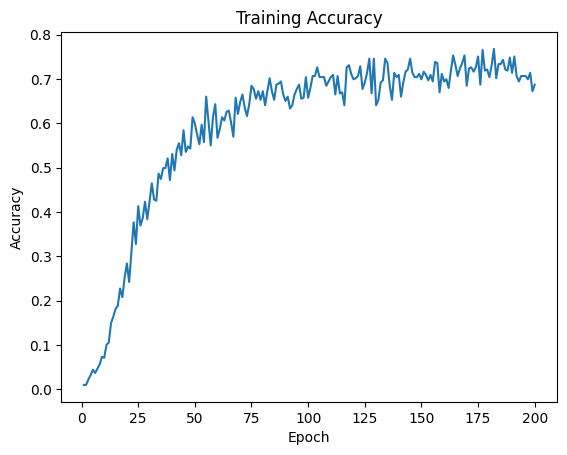

In [ ]:
# Get the accuracy values from the history
accuracy = hist.history['accuracy']

# Plot the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



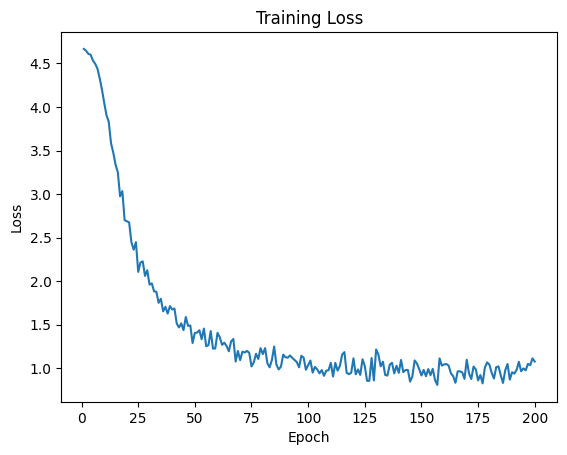

In [ ]:
# Get the loss values from the history
loss = hist.history['loss']
# Plot the loss
plt.plot(range(1, len(loss) + 1), loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

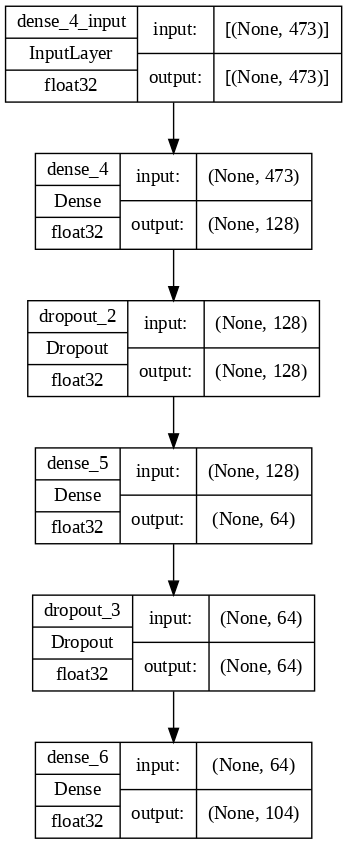

In [ ]:

tf.keras.utils.plot_model(modelv1, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='modelv3.png')

# **Model V2**     acc ≈ 0.975

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Convert training data to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Create a feedforward neural network model
model2 = Sequential()
model2.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(len(train_y[0]), activation='softmax'))

# Compile the model with the adam optimizer
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist=model2.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

# Save the trained model
model2.save('Bot_V2.h5')


Epoch 1/200
82/82 [==============================] - 2s 3ms/step - loss: 4.6497 - accuracy: 0.0147
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 4.4947 - accuracy: 0.1174
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 4.1439 - accuracy: 0.1858
Epoch 4/200
82/82 [==============================] - 0s 5ms/step - loss: 3.4733 - accuracy: 0.4010
Epoch 5/200
82/82 [==============================] - 0s 5ms/step - loss: 2.5589 - accuracy: 0.5819
Epoch 6/200
82/82 [==============================] - 1s 6ms/step - loss: 1.6978 - accuracy: 0.7311
Epoch 7/200
82/82 [==============================] - 0s 5ms/step - loss: 1.1167 - accuracy: 0.8215
Epoch 8/200
82/82 [==============================] - 1s 7ms/step - loss: 0.7486 - accuracy: 0.8924
Epoch 9/200
82/82 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.9071
Epoch 10/200
82/82 [==============================] - 1s 7ms/step - loss: 0.4023 - accuracy: 0.9340
Epoch 11/

# **Plot The Model V2**

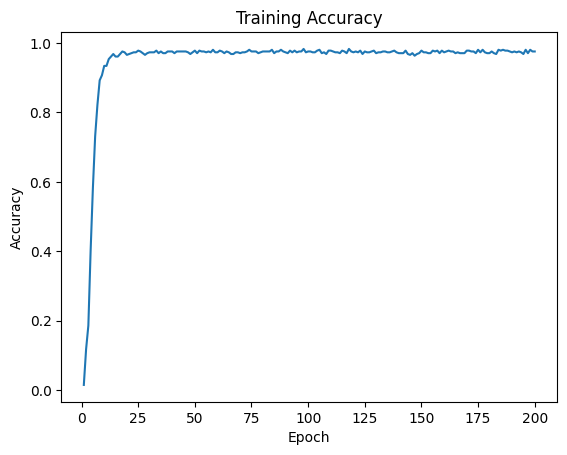

In [ ]:
# Get the accuracy values from the history
accuracy = hist.history['accuracy']

# Plot the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



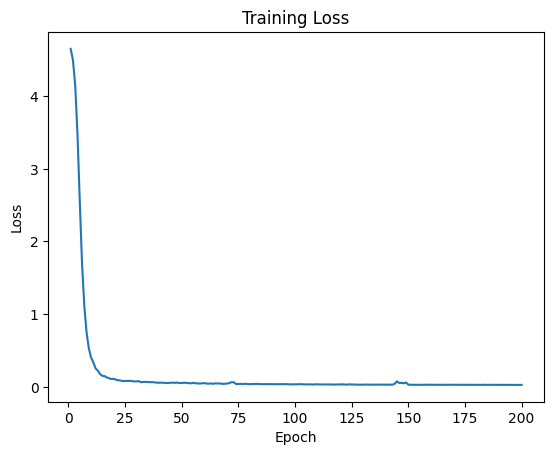

In [ ]:
# Plot the loss
loss = hist.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

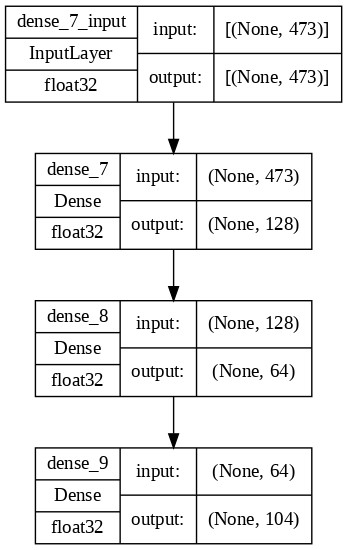

In [ ]:

tf.keras.utils.plot_model(model2, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='modelv3.png')

# **Model V3**     acc ≈ 0.83

In [ ]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Convert training data to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Create a feedforward neural network model
modelv3 = Sequential()
modelv3.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
modelv3.add(Dropout(0.5))  # Apply dropout regularization to the first layer
modelv3.add(Dense(128, activation='relu'))
modelv3.add(Dropout(0.5))  # Apply dropout regularization to the second layer
modelv3.add(Dense(64, activation='relu'))
modelv3.add(Dropout(0.5))  # Apply dropout regularization to the third layer
modelv3.add(Dense(len(train_y[0]), activation='softmax'))


# Compile the model with the adam optimizer
modelv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
hist = modelv3.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

# Save the trained model
modelv3.save('Bot_V4.h5')


Epoch 1/200
82/82 [==============================] - 2s 3ms/step - loss: 4.6651 - accuracy: 0.0049
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 4.6411 - accuracy: 0.0147
Epoch 3/200
82/82 [==============================] - 0s 5ms/step - loss: 4.6349 - accuracy: 0.0122
Epoch 4/200
82/82 [==============================] - 0s 5ms/step - loss: 4.5887 - accuracy: 0.0244
Epoch 5/200
82/82 [==============================] - 0s 5ms/step - loss: 4.5483 - accuracy: 0.0269
Epoch 6/200
82/82 [==============================] - 0s 4ms/step - loss: 4.4949 - accuracy: 0.0269
Epoch 7/200
82/82 [==============================] - 0s 4ms/step - loss: 4.4216 - accuracy: 0.0513
Epoch 8/200
82/82 [==============================] - 0s 5ms/step - loss: 4.2902 - accuracy: 0.0733
Epoch 9/200
82/82 [==============================] - 0s 4ms/step - loss: 4.2019 - accuracy: 0.0807
Epoch 10/200
82/82 [==============================] - 0s 3ms/step - loss: 3.9435 - accuracy: 0.1125
Epoch 11/

# **Plot The Model 3**

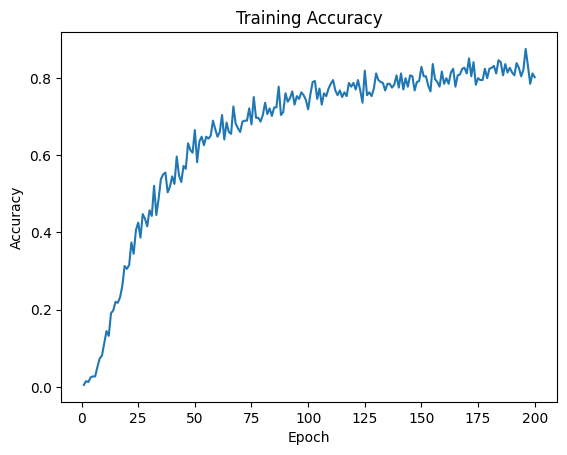

In [ ]:
# Get the accuracy and loss values from the history
accuracy = hist.history['accuracy']

# Plot the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



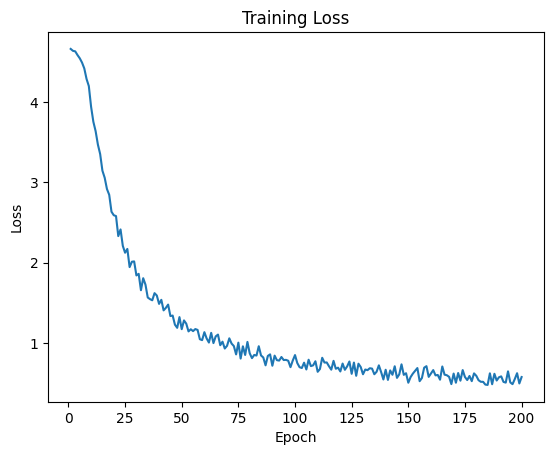

In [ ]:
# Plot the loss

loss = hist.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

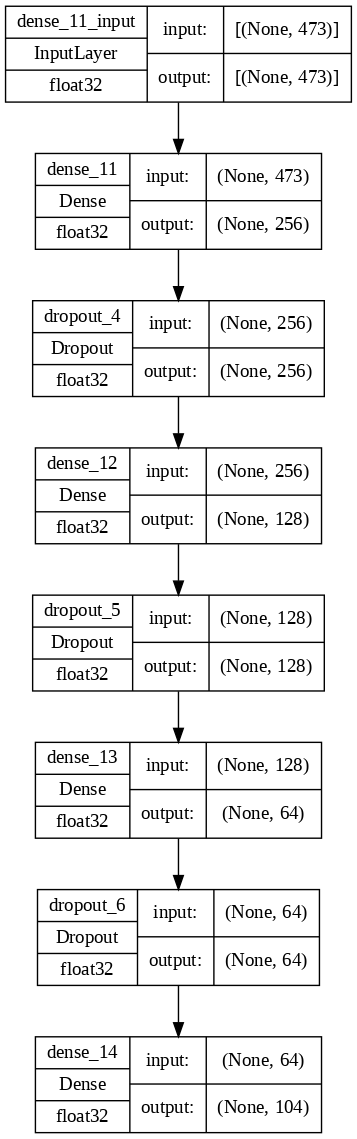

In [ ]:

tf.keras.utils.plot_model(modelv3, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='modelv4.png')

# **Model V4**     acc ≈ 0.975

In [22]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Convert training data to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Create a feedforward neural network model
modelv4 = Sequential()
modelv4.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
modelv4.add(Dropout(0.2))  # Apply dropout regularization to the first layer
modelv4.add(Dense(128, activation='relu'))
modelv4.add(Dropout(0.2))  # Apply dropout regularization to the second layer
modelv4.add(Dense(64, activation='relu'))
modelv4.add(Dropout(0.2))  # Apply dropout regularization to the third layer
modelv4.add(Dense(len(train_y[0]), activation='softmax'))


# Compile the model with the adam optimizer
modelv4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
hist = modelv4.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

# Save the trained model
modelv4.save('Bot_V4.h5')


Epoch 1/200
87/87 [==============================] - 2s 3ms/step - loss: 4.7027 - accuracy: 0.0231
Epoch 2/200
87/87 [==============================] - 0s 3ms/step - loss: 4.6230 - accuracy: 0.0370
Epoch 3/200
87/87 [==============================] - 0s 4ms/step - loss: 4.3939 - accuracy: 0.0764
Epoch 4/200
87/87 [==============================] - 0s 4ms/step - loss: 3.8543 - accuracy: 0.1505
Epoch 5/200
87/87 [==============================] - 0s 4ms/step - loss: 3.1363 - accuracy: 0.2477
Epoch 6/200
87/87 [==============================] - 0s 3ms/step - loss: 2.3547 - accuracy: 0.4120
Epoch 7/200
87/87 [==============================] - 0s 4ms/step - loss: 1.8346 - accuracy: 0.5347
Epoch 8/200
87/87 [==============================] - 0s 4ms/step - loss: 1.3898 - accuracy: 0.6296
Epoch 9/200
87/87 [==============================] - 0s 4ms/step - loss: 1.1494 - accuracy: 0.6620
Epoch 10/200
87/87 [==============================] - 0s 4ms/step - loss: 0.9481 - accuracy: 0.7106
Epoch 11/

# **Plot The Model V4**

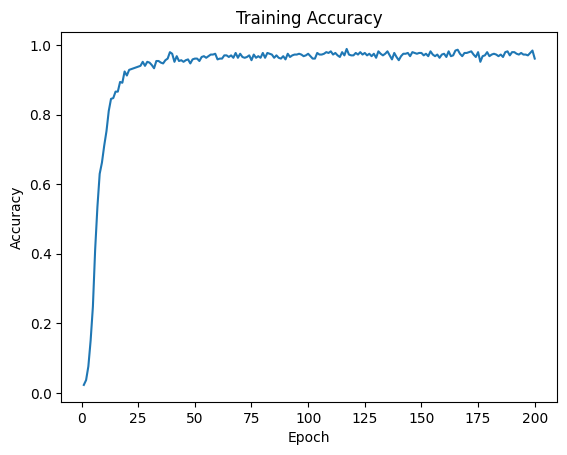

In [23]:
# Get the accuracy and loss values from the history
accuracy = hist.history['accuracy']

# Plot the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



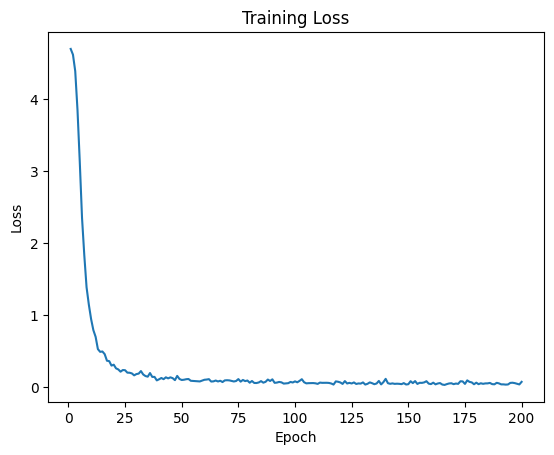

In [24]:
# Plot the loss

loss = hist.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

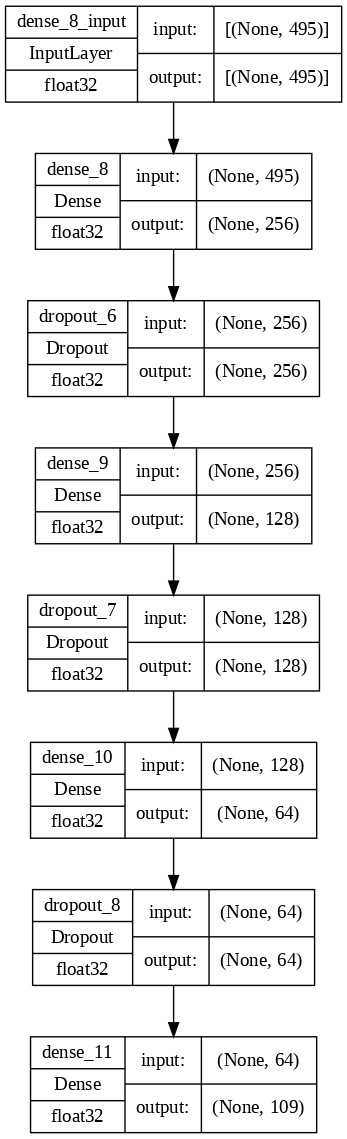

In [25]:

tf.keras.utils.plot_model(modelv4, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='modelv3.png')

# **Put models in folder to dowload**

In [ ]:
import os
import shutil
import zipfile

# Create a directory to store the contents
directory = '/content/BoT_Final'
os.makedirs(directory, exist_ok=True)

# Move the notebook and files to the created directory
files = os.listdir('/content')
for file in files:
    if file != 'BoT_Final':
        shutil.move(os.path.join('/content', file), directory)

# Zip the folder and its contents
shutil.make_archive('/content/BoT_Final', 'zip', directory)



'/content/BoT_Final.zip'

In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/BoT_Final.zip'

# Specify the directory to extract the contents to
extract_directory = '/content/unzipped_folder'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_directory)

# Optional: Remove the zip file (uncomment the line below if desired)
# os.remove(zip_file_path)

# **Test The Best Model**   

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
import json
import random

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    sentence_words = nltk.word_tokenize(sentence)
    # lematization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokeniziation(using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    #return array of nag of words
    return(np.array(bag))

#function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    #setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    print(return_list)
    return return_list


#choosing the response randomly from the predefined reponses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

#function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    res = getResponse(ints, intents)
    return res


# Main loop to continuously get user input and display bot responses
while True:
    user_input = input("You: ")
    if(user_input=='exit'):
       print('Thanks For using our ChatBOT')
       break
    else:
      response = chatbot_response(user_input)
      print("Bot:", response)


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
import json
import random

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    sentence_words = nltk.word_tokenize(sentence)
    # lemmatization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# Function to handle unknown inputs
def handle_unknown_input(prediction_accuracy):
    if prediction_accuracy < 0.5:
        response = random.choice(unknown_responses)
        print("Bot:", response)
    else:
        print("Bot: I'm sorry, but I don't have an answer for that at the moment.")

# Function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    if ints:
        res = getResponse(ints, intents)
        return res
    else:
        handle_unknown_input(ints[0]['probability'])

# List of random responses for unknown inputs
unknown_responses = [
    "Please try writing something more descriptive.",
    "Oh! It appears you wrote something I don't understand yet.",
    "Do you mind trying to rephrase that?",
    "I'm terribly sorry, I didn't quite catch that.",
    "I can't answer that yet, please try asking something else.",
    "Hmm, that's an interesting question. Unfortunately, I don't have an answer for that.",
    "I'm still learning and may not have the information you're looking for. Can you try another question?",
    "I apologize, but I'm not able to provide a response to that. Can you ask something different?",
    "I'm afraid I can't help with that inquiry. Is there something else you'd like to know?",
    "I appreciate your question, but it's beyond the scope of my knowledge. Let's try another topic."
]

# Main loop to continuously get user input and display bot responses
def start_chat():
    print("Chat started. Type 'exit' to end the chat.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chat ended.")
            break
        else:
            response = chatbot_response(user_input)
            print("Bot:", response)

start_chat()


Chat started. Type 'exit' to end the chat.
You: exit
Chat ended.


# **New Section**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import pickle
import numpy as np
from keras.models import load_model
import json
import random

# List of random responses for unknown inputs
unknown_responses = [
    "Please try writing something more descriptive.",
    "Oh! It appears you wrote something I don't understand yet.",
    "Do you mind trying to rephrase that?",
    "I'm terribly sorry, I didn't quite catch that.",
    "I can't answer that yet, please try asking something else.",
    "Hmm, that's an interesting question. Unfortunately, I don't have an answer for that.",
    "I'm still learning and may not have the information you're looking for. Can you try another question?",
    "I apologize, but I'm not able to provide a response to that. Can you ask something different?",
    "I'm afraid I can't help with that inquiry. Is there something else you'd like to know?",
    "I appreciate your question, but it's beyond the scope of my knowledge. Let's try another topic."
]

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(sentence)
    # lemmatization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# Function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    highest_confidence = float(ints[0]['probability'])  # Get the confidence of the highest probability intent
    if highest_confidence >= 0.6:
        res = getResponse(ints, intents)
        return res
    else:
        response = random.choice(unknown_responses)
        return response

# Main loop to continuously get user input and display bot responses
def start_chat():
    print("Chat started. Type 'exit' to end the chat.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chat ended.")
            break
        else:
            response = chatbot_response(user_input)
            if response:
                print("Bot:", response)

start_chat()


Chat started. Type 'exit' to end the chat.
You: hi
1/1 [==============================] - 0s 57ms/step
Bot: Hello, thanks for reaching out to us. How can we help you?
You: oiav aboal dqw q
1/1 [==============================] - 0s 21ms/step
Bot: Hello, thanks for reaching out to us. How can we help you?
You: can you ?
1/1 [==============================] - 0s 18ms/step
Bot: I appreciate your question, but it's beyond the scope of my knowledge. Let's try another topic.
You: da dfff asd a dsa
1/1 [==============================] - 0s 17ms/step
Bot: Hi there, how can we assist you today?
You: how is the weather ?
1/1 [==============================] - 0s 19ms/step
Bot: Hey there, welcome to our crowdfunding platform!
You: can you response all the answers ?
1/1 [==============================] - 0s 21ms/step
Bot: I appreciate your question, but it's beyond the scope of my knowledge. Let's try another topic.
You: sadas asda ada 
1/1 [==============================] - 0s 23ms/step
Bot: Hey t

# **Test Section With random unknown**

In [27]:

#MAIN
import nltk
from nltk.stem import WordNetLemmatizer
import pickle
import numpy as np
from keras.models import load_model
import json
import random

# List of random responses for unknown inputs
unknown_responses = [
    "Please try writing something more descriptive.",
    "Oh! It appears you wrote something I don't understand yet.",
    "Do you mind trying to rephrase that?",
    "I'm terribly sorry, I didn't quite catch that.",
    "I can't answer that yet, please try asking something else.",
    "Hmm, that's an interesting question. Unfortunately, I don't have an answer for that.",
    "I'm still learning and may not have the information you're looking for. Can you try another question?",
    "I apologize, but I'm not able to provide a response to that. Can you ask something different?",
    "I'm afraid I can't help with that inquiry. Is there something else you'd like to know?",
    "I appreciate your question, but it's beyond the scope of my knowledge. Let's try another topic."
]

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V4.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(sentence)
    # lemmatization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # sort on the basis of probability
    results = [[i, r] for i, r in enumerate(res)]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# Function to handle unknown inputs
def handle_unknown_input():
    response = random.choice(unknown_responses)
    print("Bot:", response)

# Function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    highest_confidence = float(ints[0]['probability'])  # Get the confidence of the highest probability intent
    if highest_confidence >= 0.6:
        res = getResponse(ints, intents)
        return res
    else:
        handle_unknown_input()

# Main loop to continuously get user input and display bot responses
def start_chat():
    print("Chat started. Type 'exit' to end the chat.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chat ended.")
            break
        else:
            response = chatbot_response(user_input)
            if response:
                print("Bot:", response)

start_chat()


Chat started. Type 'exit' to end the chat.
You: what is your platform fees
1/1 [==============================] - 0s 89ms/step
Bot: It's important to read the terms and conditions of a crowdfunding platform carefully, as there may be additional fees such as wire transfer fees or currency conversion fees.
You: what is your platform pricing
1/1 [==============================] - 0s 19ms/step
Bot: It's important to read the terms and conditions of a crowdfunding platform carefully, as there may be additional fees such as wire transfer fees or currency conversion fees.
You: what is crowdfunding
1/1 [==============================] - 0s 18ms/step
Bot: In simple terms, crowdfunding is the practice of funding a project or venture by raising small amounts of money from a large number of people over the internet.
You: what are the ai models you are using
1/1 [==============================] - 0s 18ms/step
Bot: By leveraging these AI models, the Intelligent Decentralized Launchpad Platform empow

# **New Section**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
import json
import random

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    sentence_words = nltk.word_tokenize(sentence)
    # lematization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    print(return_list)
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    if not ints:
        return random.choice(unknown_responses)
    res = getResponse(ints, intents)
    return res

# Main loop to continuously get user input and display bot responses
while True:
    user_input = input("You: ")
    if user_input == 'exit':
       print('Thanks For using our ChatBOT')
       break
    else:
        response = chatbot_response(user_input)
        print("Bot:", response)


# New Section

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
import json
import random

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    sentence_words = nltk.word_tokenize(sentence)
    # lematization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    print(return_list)
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    if not ints or float(ints[0]['probability']) < 0.5:
        return "I apologize, but I'm not able to provide a response to that. Can you ask something different?"
    res = getResponse(ints, intents)
    return res

# Main loop to continuously get user input and display bot responses
while True:
    user_input = input("You: ")
    if user_input == 'exit':
       print('Thanks For using our ChatBOT')
       break
    else:
        response = chatbot_response(user_input)
        print("Bot:", response)



# New Section

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
import json
import random

intents = json.loads(open('dataset.json').read())
modelv5 = load_model('Bot_V5.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # tokenization
    sentence_words = nltk.word_tokenize(sentence)
    # lemmatization
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    # tokenization (using the function we created earlier)
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    # return array of bag of words
    return np.array(bag)

# function for prediction
def predict_class(sentence, model):
    # filtering the prediction based on threshold value
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    # setting threshold value
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort on the basis of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

# choosing the response randomly from the predefined responses for the given identified intent
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

# function to return the response as output in the console
def chatbot_response(msg):
    ints = predict_class(msg, modelv5)
    if not ints or float(ints[0]['probability']) < 0.5:
        return "I apologize, but I'm not able to provide a response to that. Can you ask something different?"
    res = getResponse(ints, intents)
    return res

# Main loop to continuously get user input and display bot responses
while True:
    user_input = input("You: ")
    if user_input == 'exit':
       print('Thanks For using our ChatBOT')
       break
    else:
        response = chatbot_response(user_input)
        print("Bot:", response)


You: hi
1/1 [==============================] - 0s 82ms/step
[]
Bot: I apologize, but I'm not able to provide a response to that. Can you ask something different?
You: bjlaf qwa bdqw q qgq q
1/1 [==============================] - 0s 20ms/step
[]
Bot: I apologize, but I'm not able to provide a response to that. Can you ask something different?
You: how to start investing
1/1 [==============================] - 0s 17ms/step
[{'intent': 'campaign_launch', 'probability': '0.37696737'}, {'intent': 'choosing_platform', 'probability': '0.2667055'}]
Bot: I apologize, but I'm not able to provide a response to that. Can you ask something different?
You: what is my name 
1/1 [==============================] - 0s 18ms/step
[{'intent': 'refund', 'probability': '0.73118204'}]
Bot: Our refund policy varies depending on the circumstances. If you have questions about refunds, please contact our support team.
You: ?
1/1 [==============================] - 0s 18ms/step
[]
Bot: I apologize, but I'm not able 

KeyboardInterrupt: ignored